# Lista 2 - 218733 - Joao pedro de Moraes Bonucci

#### **1. Prove que a equação $cos(\frac{x+3}{x+5})+\frac{x}{5}$ possui pelo menos possui pelo menos uma raiz real. Encontre um intervalo de comprimento finito que contenha uma raiz desta equação.**

Utilizando o teorema de bolzano, que diz que se f eh uma funcao continua em $[a,b]$ e se $f(a) \cdot f(b) < 0$ ( ou seja f(a) e f(b) tem sinais opostos), entao existe x em $[a,b]$ tal que $f(x) = 0$ podemos provar que existe ao menos uma raiz real para a equacao dada.

Primeiramente, precisamos provar a que a equacao em questao eh continua, pelo menos em um trecho de interesse.

Pela definicao de funcao continua, sendo um intervalo $A \subset \real$, podemos definir uma funcao $f: A -> R$. Seja $c \in A$, entao $f(x)$ eh continua em c se e somente se $ \forall E > 0$ $\exists \delta > 0$ tal que $|x - c| < \delta => |f(x) - f(c)| < E$.

Para x = -5 temos $cos(\frac{-5+3}{-5+5})+\frac{-5}{5}$ como o denominador da fracao eh 0, temos uma descontinuidade

Para x > -5 temos que $|x - c| < \delta => |cos(\frac{x+3}{x+5})+\frac{x}{5} - cos(\frac{c+3}{c+5})+\frac{c}{5}| < \epsilon => |cos(\frac{x+3}{x+5}) - cos(\frac{c+3}{c+5})|+|\frac{x-c}{5}| < \epsilon$

como $|cos(\frac{x+3}{x+5}) - cos(\frac{c+3}{c+5})| \leq 2$podemos reescrever a expressao acima para

$|x - c| < \delta => |2 + \frac{x - c}{5}| < \epsilon => |x - c| < 5 \cdot \epsilon - 10$

assima achamos a prova para $\delta = 5 \cdot \epsilon - 10$

Como a funcao eh continua para esse intervalo e a funcao troca de sinal, podemos garantir que exite ao menos uma raiz.

sabendo que para x = -4 a funcao eh negativa e para x = 0 a funcao eh positiva, podemos determinar este como um intervalo finito que contem ao menos uma raiz da funcao pelo teorema de bolzano

In [9]:
using Plots
using LaTeXStrings
pyplot()

Plots.PyPlotBackend()

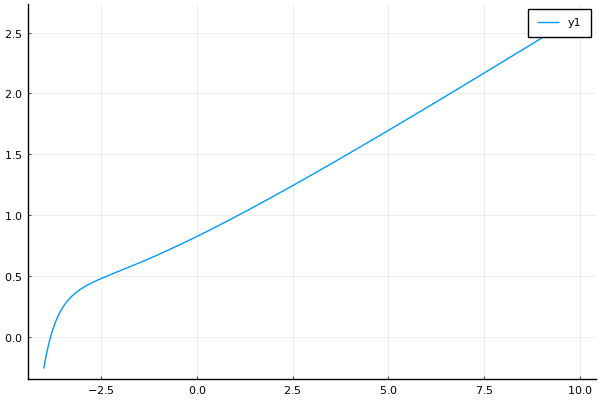

In [10]:
function expr(x)
    return cos((x+3)/(x+5))+x/5
end
x = LinRange{Float64}(-4, 10, 2000)
y = expr.(x)
plot(x, y)

#### **2. Quantas raízes a função $f(x) = x^{\frac{-1}{2}} − e^{\frac{x}{5}}$ possui?**
#### **Se possível, exiba um intervalo que contem uma raiz.**
#### **Obs: A função não tem domínio em toda a reta real.**

a funcao contem uma unica raiz devido seu comportamento decrescente monotono

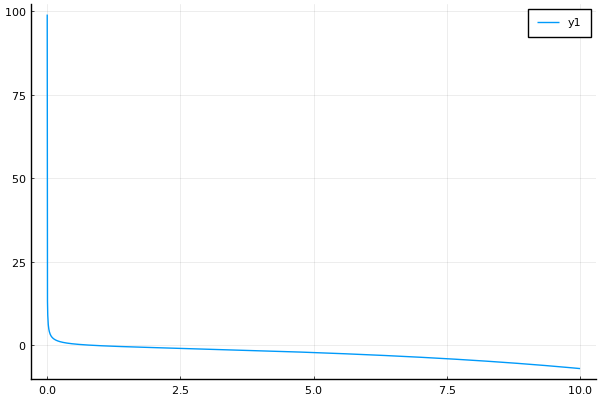

In [11]:
function expr(x)
    return x^(-1/2) - 2.7182818284590452353602874713526624977572470936999595749669676277240766303535475945713821785251664274274663919320030599218174135^(x/5)
end
x = LinRange{Float64}(0.0001, 10, 2000)
y = expr.(x)
plot(x, y)

#### **3. Dado $\epsilon = 10^{−4}$ e a função** $f(x) = \frac{x+1}{x^2} - \frac{x^3}{10}$

**Identifique um intervalo que contenha um zero de f . Partindo desse intervalo aproxime um zero usando:**
- **O método da bissecção parando com $|x_{k+1} − x_k | < \epsilon$**
- **O método da bissecção parando com $|f (x_k) < \epsilon|$**

**Quantas iterações foram necessárias em cada caso?**

**Qual foi a aproximação encontrada?**

**Qual tinha o menor valor de $|f(x)|$?**

- Dominio: $D = \reals \setminus {0}$
- Raizes: $ \frac{x+1}{x^2} - \frac{x^3}{10} = 0 \rightarrow 10\cdot(x+1) - x^5 = 0 \rightarrow  x^5 - 10x - 10 = 0 \rightarrow x \approx 1.970444926576$
- Interseccao com eixo y: $\lim_{x \rightarrow 0}\frac{x+1}{x^2} - \frac{x^3}{10} = \infty$
- pontos criticos: $ f'(x) = -\frac{3x^5 + 10x + 20}{10x^3} = 0 \rightarrow x \approx -1.212807637953$
- minimo local: $f''(x) = \frac{6}{x^4} + \frac{2}{x^3} - \frac{3x}{5} \rightarrow f''(-1.212807637953) \approx 2.379774200263 > 0$ o ponto eh minimo local com convavidade para cima
- crescente: $\infty < x \leq -1.212807637953...$
- derescente: $0 < x < \infty$
- assintota: x = 0
- tende ao infinito negativo para x positivo
- tende para infinito positivo para x negativo

Com a analise acima podemos ver que a funcao apresenta uma raiz entre $0$ e $\infty$, no entanto podemos ver que se $x^3 > \frac{10x + 10}{x^2}$ a funcao passa a ser negativa. Para x = 3 temos que $ 3^3 = 27 > \frac{10 \cdot 3 - 10}{3^2} = \frac{40}{9}$ e para x = 1 temos que $ 1^3 = 1 < \frac{10 \cdot 1 + 10}{1^2} = 20$, logo analisarei o intervalo entre 1 e 3 pois pelo teorema de bolzano, garantimos que existe uma raiz contida nele

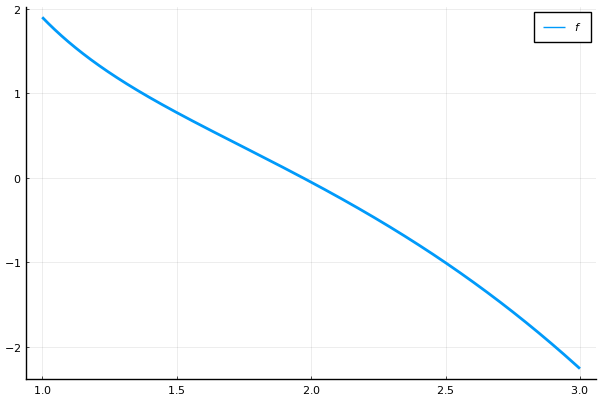

In [12]:
# Define a função
f(x) = (x+1)/x^2 - x^3/10
#f(x) = (10 + 10*x - x^5)/(10*x^2)
# Define o intervalo
x = LinRange{BigFloat}(1, 3, 10000)
# Desenha o gráfico e o eixo x.
plot(x, f.(x), label=L"f", lw=2)

In [13]:
# Método da bisseccao
function bisseccao(f, a, b, usa_medio=true, epsilon=1.0e-5)
	iter = 0

	medio = (a + b)/2.0
	anterior = abs(b * 10)
	while true
		medio = (a + b)/2.0
		println("$iter: $medio")
		if f(medio)*f(a) > 0.0
			a = medio
		else
			b = medio
		end
		iter += 1
		if abs(medio - anterior) < epsilon
			break
		end
		anterior = medio
	end
	println("$iter: $medio")
	return medio
end

println("com a segunda condicao:")
raiz = bisseccao(f, 1.0, 3.0, false)
@show f(raiz)

com a segunda condicao:
0: 2.0
1: 1.5
2: 1.75
3: 1.875
4: 1.9375
5: 1.96875
6: 1.984375
7: 1.9765625
8: 1.97265625
9: 1.970703125
10: 1.9697265625
11: 1.97021484375
12: 1.970458984375
13: 1.9703369140625
14: 1.97039794921875
15: 1.970428466796875
16: 1.9704437255859375
17: 1.9704513549804688
18: 1.9704513549804688
f(raiz) = -1.0823969794904187e-5


-1.0823969794904187e-5

In [14]:
# Método da bisseccao
function bisseccao(f, a, b, usa_medio=true, epsilon=1.0e-5)
	iter = 0

	medio = (a + b)/2.0
	while true
		medio = (a + b)/2.0
		println("$iter: $medio")
		if f(medio)*f(a) > 0.0
			a = medio
		else
			b = medio
		end
		iter += 1
		if abs(f(medio)) < abs(epsilon)
			break
		end
	end
	println("$iter: $medio")
	return medio
end

println("coma a segunda condicao:")
raiz = bisseccao(f, 1.0, 3.0)
@show f(raiz)

coma a segunda condicao:
0: 2.0
1: 1.5
2: 1.75
3: 1.875
4: 1.9375
5: 1.96875
6: 1.984375
7: 1.9765625
8: 1.97265625
9: 1.970703125
10: 1.9697265625
11: 1.97021484375
12: 1.970458984375
13: 1.9703369140625
14: 1.97039794921875
15: 1.970428466796875
16: 1.9704437255859375
17: 1.9704437255859375
f(raiz) = 2.0221921093188655e-6


2.0221921093188655e-6

#### **4. Deduza um método para computo da raiz cúbica de um número x a partir do método de Newton, de forma análoga ao que fizemos com a raiz quadrada nas notas de aula. Aplique 4 passos seu método para calcular a raiz cúbica de 10 partindo do número 3. Quantas casas decimais corretas a aproximação obtida possui?**

$$f(x) = x^3 - a = 0$$
$$f'(x) = 3x^2$$
$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$$
$$x_{k+1} = x_k - \frac{{x_k}^3 - a}{3{x_k}^2}$$
$$x_{k+1} = \frac{1}{3}(2x_k +\frac{a}{{x_k}^2})$$


Com essa implementacao e utilizando Float64 foi possivel atingir 7 casa de precisão com 4 iterações

In [15]:
a = 10
xk = 3
prec = 1.0e-15
iters = 0
println(iters, ": ", xk)
while iters < 4 && abs((xk*xk*xk - a)/a) > prec
xk = Float64(1/3*(2*xk + a/xk^2))
iters += 1
println(iters, ": ", xk)
end
a = BigFloat(a^(1/3))
println("\nValor 'exato': ", a)
@show xk*xk*xk

0: 3
1: 2.3703703703703702
2: 2.173508632330247
3: 2.154601586556419
4: 2.154434702959439

Valor 'exato': 2.154434690031883814498314677621237933635711669921875
xk * xk * xk = 10.000000180013187


10.000000180013187

#### **5. Escreva explicitamente qual o próximo iterado de Newton, $x_{k+1}$ , quando usando para resolver a equação $x^3 = 0$ partindo de um valor $0 < x^k ≤ 1$**

#### **Qual razão entre a distância de $x_{k+1}$ à raiz da equação quando comparada a distância de $x_k$ a essa raiz? Considerando o teorema de convergência visto em sala de aula o resultado é esperado? Há alguma contradição com o que foi provado? Justifique.**

funcao estudada: $f(x) = x^3$
primeira derivada: $ f'(x) = 3x^2$
segunda derivada: $ f''(x) = 6x$
terceira derivada: $ f^{(3)}(x) = 6$
quarta derivada: $ f^{(4)}(x) = 0$

Pelo teorema de taylor existe x e y tal que: 
$$f(y) = f(x) + f'(x)(y-x)+\frac{f''(x)}{2}(y-x^2)+\frac{f^{(3)}(x)}{6}(y-x^3)$$
que para a funcao estuda pode ser reescrito como:
$$f(y) = f(x) + 3x^2(y-x)+\frac{6x}{2}(y-x^2)+\frac{6}{6}(y-x^3)$$
e simplificada para:
$$f(y) = f(x) + 3x^2(y-x)+3x(y-x^2)+(y-x^3)$$

Pelo metodo de Newton sabemos que dado um $x_k$ qualquer o proximo ponto iterado sera dado por
$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$$
$$x_{k+1} = x_k - \frac{{x_k}^3}{3{x_k}^2}$$
$$x_{k+1} = \frac{1}{3}(2x_k)$$

partindo de $x_k = 1$ temos que $x_{k+1} = \frac{2}{3}$
partindo de $x_k = 1\cdot 10^{-200}$ temos que $x_{k+1} = \frac{2\cdot 10^{-200}}{3}$

ou seja, a cada iteracao a distancia da aproximacao e da raiz real reduz em $\frac{1}{3}$

Utilizando as mesmas variaveis do teorema de convergencia estudado em aula temos que:
$$x_k = 1$$ 
$$x_{k+1} = \frac{2}{3}$$ 
$$x^* = 0$$


Logos deve existir M tal que 
$$\frac{|x_{k+1} − x^∗|}{|xk − x^∗|^2} = \frac{2}{3} ≤ M$$

Logo o resultado eh esperado pelo teorema de convergência

In [16]:
a = 0
xk = 1
prec = 1.0e-18
iters = 0
println(iters, ": ", xk)
while iters < 10000 && abs((xk*xk*xk - a)/a) > prec
xk = Float64(1/3*(2*xk))
iters += 1
println(iters, ": ", xk)
end

@show xk

0: 1
1: 0.6666666666666666
2: 0.4444444444444444
3: 0.2962962962962963
4: 0.19753086419753085
5: 0.1316872427983539
6: 0.08779149519890259
7: 0.058527663465935055
8: 0.03901844231062337
9: 0.026012294873748912
10: 0.017341529915832606
11: 0.011561019943888404
12: 0.007707346629258935
13: 0.005138231086172623
14: 0.0034254873907817486
15: 0.0022836582605211654
16: 0.0015224388403474436
17: 0.0010149592268982957
18: 0.0006766394845988638
19: 0.00045109298973257584
20: 0.0003007286598217172
21: 0.00020048577321447815
22: 0.00013365718214298543
23: 8.910478809532361e-5
24: 5.940319206354907e-5
25: 3.960212804236605e-5
26: 2.64014186949107e-5
27: 1.760094579660713e-5
28: 1.1733963864404753e-5
29: 7.822642576269835e-6
30: 5.215095050846556e-6
31: 3.476730033897704e-6
32: 2.317820022598469e-6
33: 1.5452133483989794e-6
34: 1.0301422322659861e-6
35: 6.86761488177324e-7
36: 4.5784099211821597e-7
37: 3.0522732807881063e-7
38: 2.0348488538587375e-7
39: 1.3565659025724915e-7
40: 9.043772683816609e-

1.1377797470190824e-108